In [151]:
import numpy as np    # linear algebra
import pandas as pd   # data structure library

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# load 2014 loksabha data into a pandas dataframe.
data = pd.read_csv(r"C:\Users\tejar\Downloads\LS2014Candidate.csv")

In [153]:
# To view first five rows in the data
data.head(5)

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


In [154]:
# To get how many data points and features 
data.shape,data.size

((8794, 14), 123116)

In [155]:
# to print the column names in the dataset
data.columns

Index(['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'Candidate Name', 'Candidate Sex', 'Candidate Category',
       'Candidate Age', 'Party Abbreviation', 'Total Votes Polled',
       'Position'],
      dtype='object')

In [156]:
# to print the summary of the data
data.describe()

,Month,Year,PC Number,Candidate Age,Total Votes Polled,Position
count,8794.0,8794.0,8794.000000,8252.000000,8794.000000,8794.000000
mean,5.0,2014.0,19.521833,47.151600,62975.090516,9.788037
std,0.0,0.0,17.063619,11.903234,141162.794523,6.738093
min,5.0,2014.0,1.000000,25.000000,105.000000,1.000000
25%,5.0,2014.0,7.000000,38.000000,1762.000000,5.000000
50%,5.0,2014.0,15.000000,46.000000,4519.000000,9.000000
75%,5.0,2014.0,28.000000,56.000000,15225.000000,13.000000
max,5.0,2014.0,80.000000,93.000000,863358.000000,43.000000


In [157]:
# to print the data type of each column
data.dtypes

ST_CODE                object
State name             object
Month                   int64
Year                    int64
PC Number               int64
PC name                object
PC Type                object
Candidate Name         object
Candidate Sex          object
Candidate Category     object
Candidate Age         float64
Party Abbreviation     object
Total Votes Polled      int64
Position                int64
dtype: object

In [158]:
# Renaming the columns such that it should not contain spaces
n_data = data.rename(columns={'PC Number':'PC_Number','State name':'State_Name','PC name':'PC_name','PC Type':'PC_Type',
                     'Candidate Name':'Candidate_Name','Candidate Sex':'Candidate_Sex','Candidate Category':'Candidate_Category',
                    'Candidate Age':'Candidate_Age','Party Abbreviation':'Party_Abbreviation','Total Votes Polled':'Total_VotesPolled'})

In [159]:
n_data.head()

,ST_CODE,State_Name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_VotesPolled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


In [160]:
n_data.index.values

array([   0,    1,    2, ..., 8791, 8792, 8793], dtype=int64)

In [161]:
# to print the column names in the data
n_data.columns.values

array(['ST_CODE', 'State_Name', 'Month', 'Year', 'PC_Number', 'PC_name',
       'PC_Type', 'Candidate_Name', 'Candidate_Sex', 'Candidate_Category',
       'Candidate_Age', 'Party_Abbreviation', 'Total_VotesPolled',
       'Position'], dtype=object)

## Handling Null values

In [162]:
# Checking the null values in the data.
n_data.isnull().sum()

ST_CODE                 0
State_Name              0
Month                   0
Year                    0
PC_Number               0
PC_name                 0
PC_Type                 0
Candidate_Name          0
Candidate_Sex         542
Candidate_Category    542
Candidate_Age         542
Party_Abbreviation      0
Total_VotesPolled       0
Position                0
dtype: int64

In [163]:
# filling the null values in candidate sex with mode
n_data['Candidate_Sex'].fillna(str(n_data['Candidate_Sex'].mode().values[0]), inplace = True)

In [164]:
# As the candidate category depends on PC type, we are filling those null values with PC type
n_data['Candidate_Category'].fillna(str(n_data['PC_Type'].values[0]), inplace = True)

In [165]:
# imputing median for the null values in candidate age
def impute_median(series):
    return series.fillna(series.median())

n_data.Candidate_Age=n_data['Candidate_Age'].transform(impute_median)

In [166]:
# checking the data again after missing vakue imputation
n_data.isnull().sum()

ST_CODE               0
State_Name            0
Month                 0
Year                  0
PC_Number             0
PC_name               0
PC_Type               0
Candidate_Name        0
Candidate_Sex         0
Candidate_Category    0
Candidate_Age         0
Party_Abbreviation    0
Total_VotesPolled     0
Position              0
dtype: int64

## Visualizations

In [167]:
# min and max age of the contested candidates
np.min(n_data['Candidate_Age']),np.max(n_data['Candidate_Age'])

(25.0, 93.0)

In [186]:
# to print the details of the candidate who got highest number of votes
max_votes = n_data[(n_data['Total_VotesPolled'] == np.max(n_data['Total_VotesPolled']))]
max_votes

,ST_CODE,State_Name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_VotesPolled,Position
4930,S20,Rajasthan,5,2014,7,Jaipur,GEN,RAMCHARAN BOHARA,0.0,GEN,56.0,BJP,863358,1


M    8120
F     668
O       6
Name: Candidate_Sex, dtype: int64

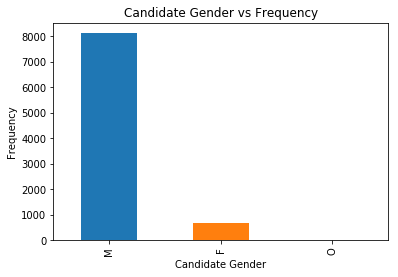

In [168]:
# plotting a bar graph between candidate gender vs count
gender_bar = n_data.Candidate_Sex.value_counts()
gender_bar.plot('bar', title='Candidate Gender vs Frequency')
plt.ylabel('Frequency')
plt.xlabel('Candidate Gender')
gender_bar

#### Out of 8794 contested candidates males are 8120, females are 668 and 6 others

Text(0.5,0,'Candidate Category')

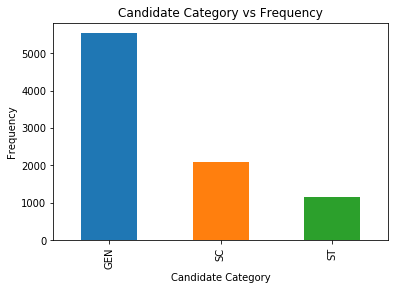

In [169]:
#plotting bar for candidate category and count
Cancat_bar = n_data.Candidate_Category.value_counts()
Cancat_bar.plot('bar', title='Candidate Category vs Frequency')
plt.ylabel('Frequency')
plt.xlabel('Candidate Category')

#### As shown, the General category candidates are more than SC and ST category candidates

Text(0,0.5,'Count')

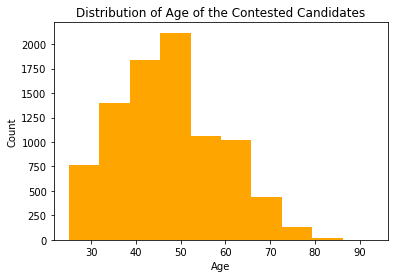

In [170]:
#plotting a histogram to show the distribution of age of the contested candidates
age_hist = n_data.Candidate_Age.tolist()
plt.hist([age_hist], color='orange')
plt.title('Distribution of Age of the Contested Candidates')
plt.xlabel('Age')
plt.ylabel('Count')

#### Most of the candidates are between 40 to 50 age group

In [171]:
# to print the total candidates contested in each state
n_data['State_Name'].value_counts()

Uttar Pradesh                1368
Maharashtra                   945
Tamil Nadu                    884
Bihar                         647
Andhra Pradesh                640
West Bengal                   514
Karnataka                     462
Madhya Pradesh                407
Gujarat                       360
Rajasthan                     345
Kerala                        289
Punjab                        266
Jharkhand                     254
Haryana                       240
Chattisgarh                   222
Odisha                        217
Assam                         176
NCT OF Delhi                  157
Jammu & Kashmir                83
Uttarakhand                    79
Himachal Pradesh               42
Puducherry                     31
Tripura                        27
Goa                            21
Manipur                        20
Chandigarh                     18
Andaman & Nicobar Islands      16
Arunachal Pradesh              13
Meghalaya                      12
Dadra & Nagar 

In [172]:
# printing the details of all elected candidates
Elected_candidates = n_data[(n_data['Position']==1)]
Elected_candidates

,ST_CODE,State_Name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_VotesPolled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
9,S01,Andhra Pradesh,5,2014,2,Peddapalle,SC,BALKA SUMAN,M,SC,31.0,TRS,565496,1
27,S01,Andhra Pradesh,5,2014,3,Karimnagar,GEN,VINOD KUMAR BOINAPALLY,M,GEN,54.0,TRS,505358,1
45,S01,Andhra Pradesh,5,2014,4,Nizamabad,GEN,KALVAKUNTLA KAVITHA,F,GEN,36.0,TRS,439307,1
62,S01,Andhra Pradesh,5,2014,5,Zahirabad,GEN,B.B. PATIL,M,GEN,58.0,TRS,508661,1
73,S01,Andhra Pradesh,5,2014,6,Medak,GEN,KALVAKUNTLA CHANDRASEKHAR RAO,M,GEN,60.0,TRS,657492,1
87,S01,Andhra Pradesh,5,2014,7,Malkajgiri,GEN,CH.MALLA REDDY,M,GEN,56.0,TDP,523356,1
118,S01,Andhra Pradesh,5,2014,8,Secundrabad,GEN,BANDARU DATTATREYA,M,GEN,66.0,BJP,438271,1
149,S01,Andhra Pradesh,5,2014,9,Hyderabad,GEN,ASADUDDIN OWAISI,M,GEN,43.0,AIMIM,513868,1
166,S01,Andhra Pradesh,5,2014,10,CHELVELLA,GEN,KONDA VISHWESHWAR REDDY,M,GEN,54.0,TRS,435077,1


M    481
F     62
Name: Candidate_Sex, dtype: int64

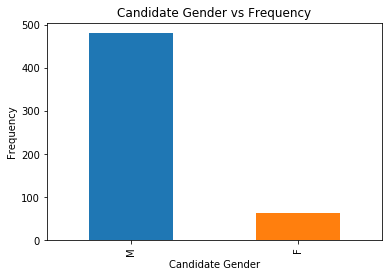

In [173]:
# plotting a bar graph for elected candidate gender 
g_bar = Elected_candidates.Candidate_Sex.value_counts()
g_bar.plot('bar', title='Candidate Gender vs Frequency')
plt.ylabel('Frequency')
plt.xlabel('Candidate Gender')
g_bar

##### Out of 543 elected members 481 are male and 62 are female.

In [174]:
# to print the parties contested in 2014 election and count 
parties = data['Party Abbreviation'].unique()

print('Total number of parties ', len(parties))
parties

Total number of parties  466


array(['TRS', 'INC', 'TDP', 'BSP', 'IND', 'NOTA', 'RP(K)', 'PPOI', 'RPI',
       'MaSP', 'NIP', 'BCUF', 'BJP', 'WPOI', 'RPI(A)', 'NCP', 'BMUP',
       'YSRCP', 'AAAP', 'MBT', 'LSP', 'AIMIM', 'SHP', 'JaSPa', 'SHS',
       'TLP', 'BCBDP', 'APRSSP', 'ICSP', 'TECPI', 'RSP', 'RPI(KH)',
       'mmsp', 'pjdl', 'JAP', 'ABML(S)', 'IUML', 'SUCI', 'sps', 'AIFB',
       'AIACP', 'SP(I)', 'NBNP', 'MCPI', 'CPM', 'RLD', 'CPI',
       'CPI(ML)(L)', 'DABAP', 'RJD', 'GaAP', 'RPC(S)', 'ILP(AP)', 'ARPS',
       'GRIP', 'NPT', 'SDP', 'STR', 'RPS', 'JD(U)', 'ANC', 'JD(S)',
       'RDHP', 'HJP', 'PPA', 'AITC', 'LB', 'AIUDF', 'AGP', 'SP', 'JMM',
       'BOPF', 'rdsc', 'BED', 'JPS', 'BJKVP', 'KS', 'JMBP', 'JKNPP',
       'JDR', 'ravp', 'SKLP', 'NaLP', 'BLSP', 'LD', 'SJP(R)', 'JPJD',
       'AKBMP', 'BVM', 'VIP', 'JHP', 'LKJP', 'RVNP', 'PSS', 'BMF', 'BEMP',
       'BJJD', 'JDP', 'PECP', 'RKSP', 'PBI', 'LJP', 'RSMD', 'LPSP',
       'RJJM', 'RBCP', 'GGP', 'SWSP', 'BJPARTY', 'NADP', 'MHD', 'BBC',
       'RND', 'NT

In [175]:
# to print the total seats won by each party
seatswon = data[(data.Position==1)].groupby(['Party Abbreviation'])['Position'].sum()
seatswon

Party Abbreviation
AAAP        4
AD          2
ADMK       37
AIMIM       1
AINRC       1
AITC       34
AIUDF       3
BJD        20
BJP       282
BLSP        3
CPI         1
CPM         9
INC        44
IND         3
INLD        2
IUML        2
JD(S)       2
JD(U)       2
JKPDP       3
JMM         2
KEC(M)      1
LJP         6
NCP         6
NPEP        1
NPF         1
PMK         1
RJD         4
RSP         1
SAD         4
SDF         1
SHS        18
SP          5
SWP         1
TDP        16
TRS        11
YSRCP       9
Name: Position, dtype: int64

In [176]:
# a function to print the details of the candidates elected in a given state
def state(name):
    elected = n_data[(n_data['State_Name']== name) & (n_data['Position']==1)]
    return elected

In [177]:
state('Bihar')

,ST_CODE,State_Name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_VotesPolled,Position
829,S04,Bihar,5,2014,1,Valmiki Nagar,GEN,SATISH CHANDRA DUBEY,M,GEN,39.0,BJP,364013,1
844,S04,Bihar,5,2014,2,Paschim Champaran,GEN,DR. SANJAY JAISWAL,M,GEN,49.0,BJP,371232,1
857,S04,Bihar,5,2014,3,Purvi Champaran,GEN,RADHA MOHAN SINGH,M,GEN,64.0,BJP,400452,1
873,S04,Bihar,5,2014,4,Sheohar,GEN,RAMA DEVI,F,GEN,65.0,BJP,372506,1
889,S04,Bihar,5,2014,5,Sitamarhi,GEN,RAM KUMAR SHARMA,M,GEN,50.0,BLSP,411265,1
909,S04,Bihar,5,2014,6,Madhubani,GEN,HUKM DEO NARAYAN YADAV,M,GEN,77.0,BJP,358040,1
921,S04,Bihar,5,2014,7,Jhanjharpur,GEN,BIRENDRA KUMAR CHAUDHARY,M,GEN,60.0,BJP,335481,1
941,S04,Bihar,5,2014,8,Supaul,GEN,RANJEET RANJAN,F,GEN,41.0,INC,332927,1
954,S04,Bihar,5,2014,9,Araria,GEN,TASLEEM UDDIN,M,GEN,72.0,RJD,407978,1
968,S04,Bihar,5,2014,10,Kishanganj,GEN,MOHAMMAD ASRARUL HAQUE,M,GEN,67.0,INC,493461,1


In [178]:
# a function to print the details of the contested candidates in a given constituency
def constituency(name):
    candidates = n_data[(n_data['PC_name'] == name)]
    return candidates

In [179]:
constituency('Rajasthan')

,ST_CODE,State_Name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_VotesPolled,Position


In [180]:
# a function to print the details of the contested candidates with in specified range of age 
def c_age(lim1,lim2):
    candidates = n_data[(n_data['Candidate_Age'] > lim1) & (n_data['Candidate_Age'] < lim2)]
    return candidates

In [181]:
c_age(80,90)

,ST_CODE,State_Name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_VotesPolled,Position
670,S03,Assam,5,2014,2,Silchar,GEN,KABINDRA PURKAYASTHA,M,GEN,82.0,BJP,301210,2
798,S03,Assam,5,2014,12,Jorhat,GEN,BIJOY KRISHNA HANDIQUE,M,GEN,82.0,INC,354000,2
1559,S06,Gujarat,5,2014,6,Gandhinagar,GEN,L.K.ADVANI,M,GEN,86.0,BJP,773539,1
1631,S06,Gujarat,5,2014,10,Rajkot,GEN,PRAVINCHANDRA CHUNILAL PAREKH,M,GEN,83.0,IND,1562,9
2449,S10,Karnataka,5,2014,16,Hassan,GEN,H.D. DEVEGOWDA,M,GEN,81.0,JD(S),509841,1
2953,S11,Kerala,5,2014,20,Thiruvananthapuram,GEN,O RAJAGOPAL,M,GEN,84.0,BJP,282336,2
4312,S13,Maharashtra,5,2014,48,Hatkanangle,GEN,AWADE KALLAPPA BABURAO,M,GEN,82.0,INC,462618,2
4964,S20,Rajasthan,5,2014,8,Alwar,GEN,CHAUDHARY NASRUDEEN TANWAR,M,GEN,82.0,SP(I),662,18
5130,S20,Rajasthan,5,2014,20,Banswara,ST,BHANJI BHAI,M,ST,81.0,JD(U),21760,5
6219,S24,Uttar Pradesh,5,2014,8,Sambhal,GEN,DR SHAFIQ- UR RAHMAN BARQ,M,GEN,81.0,SP,355068,2


## Converting categorical variables into quantitative variables

In [182]:
# replacing males with 0 and females with 1
n_data['Candidate_Sex'] = n_data['Candidate_Sex'].map({'M':0,'F':1})
n_data.index = n_data.index.map(int)